# Задание 1.1 - Метод К-ближайших соседей (K-neariest neighbor classifier)

В первом задании вы реализуете один из простейших алгоритмов машинного обучения - классификатор на основе метода K-ближайших соседей.
Мы применим его к задачам
- бинарной классификации (то есть, только двум классам)
- многоклассовой классификации (то есть, нескольким классам)

Так как методу необходим гиперпараметр (hyperparameter) - количество соседей, мы выберем его на основе кросс-валидации (cross-validation).

Наша основная задача - научиться пользоваться numpy и представлять вычисления в векторном виде, а также ознакомиться с основными метриками, важными для задачи классификации.

Перед выполнением задания:
- запустите файл `download_data.sh`, чтобы скачать данные, которые мы будем использовать для тренировки
- установите все необходимые библиотеки, запустив `pip install -r requirements.txt` (если раньше не работали с `pip`, вам сюда - https://pip.pypa.io/en/stable/quickstart/)

Если вы раньше не работали с numpy, вам может помочь tutorial. Например этот:  
http://cs231n.github.io/python-numpy-tutorial/

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
from dataset import load_svhn
from knn import KNN
from metrics import binary_classification_metrics, multiclass_accuracy

# Загрузим и визуализируем данные

В задании уже дана функция `load_svhn`, загружающая данные с диска. Она возвращает данные для тренировки и для тестирования как numpy arrays.

Мы будем использовать цифры из датасета Street View House Numbers (SVHN, http://ufldl.stanford.edu/housenumbers/), чтобы решать задачу хоть сколько-нибудь сложнее MNIST.

In [3]:
train_X, train_y, test_X, test_y = load_svhn("data", max_train=1000, max_test=100)

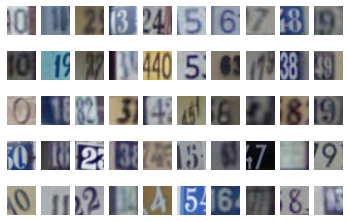

In [4]:
samples_per_class = 5  # Количество изображений каждого класса для отрисовки
plot_index = 1
for example_index in range(samples_per_class):
    for class_index in range(10):
        plt.subplot(5, 10, plot_index)
        image = train_X[train_y == class_index][example_index]
        plt.imshow(image.astype(np.uint8))
        plt.axis('off')
        plot_index += 1

# Сначала реализуем KNN для бинарной классификации

В качестве задачи бинарной классификации мы натренируем модель, которая будет отличать цифру 0 от цифры 9.

In [5]:
# Для начала подготовим изображения цифр и к какому классу они принадлежат

# Выберем только нули и девятки
binary_train_mask = (train_y == 0) | (train_y == 9)
binary_train_X = train_X[binary_train_mask]
binary_train_y = train_y[binary_train_mask] == 0

binary_test_mask = (test_y == 0) | (test_y == 9)
binary_test_X = test_X[binary_test_mask]
binary_test_y = test_y[binary_test_mask] == 0

# Используем функцию reshape для приведения каждого изображения к одномерному массиву [num_samples, 32*32*3]
binary_train_X = binary_train_X.reshape(binary_train_X.shape[0], -1)
binary_test_X = binary_test_X.reshape(binary_test_X.shape[0], -1)

In [6]:
# Создадим классификатор и вызовем функцию fit для обучения модели
# KNN запомнит все данные
knn_classifier = KNN(k=1)
knn_classifier.fit(binary_train_X, binary_train_y)

Последовательно реализуем функции `compute_distances_two_loops`, `compute_distances_one_loop` и `compute_distances_no_loops`
в файле `knn.py`.

Эти функции строят массив расстояний между всеми векторами в тестовом наборе и в тренировочном наборе.  
В результате они должны построить массив размера `(num_test, num_train)`, где координата `[i][j]` соотвествует расстоянию между i-м вектором в test (`test[i]`) и j-м вектором в train (`train[j]`).

**Обратите внимание** Для простоты реализации мы будем использовать в качестве расстояния меру L1 (ее еще называют [Manhattan distance](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%B3%D0%BE%D1%80%D0%BE%D0%B4%D1%81%D0%BA%D0%B8%D1%85_%D0%BA%D0%B2%D0%B0%D1%80%D1%82%D0%B0%D0%BB%D0%BE%D0%B2)).

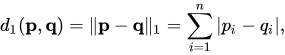

In [7]:
# Посчитаем растояния при помощи функции compute_distances_two_loops в knn.py
dists = knn_classifier.compute_distances_two_loops(binary_test_X)
assert np.isclose(dists[0, 10], np.sum(np.abs(binary_test_X[0] - binary_train_X[10])))

In [8]:
# TODO: Дополнительное задание - реализуйте функцию compute_distances_one_loop в knn.py
dists = knn_classifier.compute_distances_one_loop(binary_test_X)
assert np.isclose(dists[0, 10], np.sum(np.abs(binary_test_X[0] - binary_train_X[10])))

In [9]:
# TODO: Дополнительное задание - реализуйте функцию compute_distances_no_loops в knn.py
dists = knn_classifier.compute_distances_no_loops(binary_test_X)
assert np.isclose(dists[0, 10], np.sum(np.abs(binary_test_X[0] - binary_train_X[10])))

In [10]:
# Дополнительное задание - сравните время вычислений с циклами и без.
%timeit knn_classifier.compute_distances_two_loops(binary_test_X)
%timeit knn_classifier.compute_distances_one_loop(binary_test_X)
%timeit knn_classifier.compute_distances_no_loops(binary_test_X)

15.2 ms ± 354 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
8.92 ms ± 7.04 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.01 ms ± 5.17 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [11]:
# Сделаем предсказание при помощи функции predict_labels_binary в knn.py
prediction = knn_classifier.predict(binary_test_X, 1)

In [12]:
# Найдем метрики предсказания при помощи функции binary_classification_metrics в metrics.py
precision, recall, f1, accuracy = binary_classification_metrics(prediction, binary_test_y)
print("KNN with k = %s" % knn_classifier.k)
print("Accuracy: %4.2f, Precision: %4.2f, Recall: %4.2f, F1: %4.2f" % (accuracy, precision, recall, f1)) 

KNN with k = 1
Accuracy: 0.25, Precision: 0.50, Recall: 0.17, F1: 0.25


In [13]:
# Проверим работу реализованых функций для K = 3
knn_classifier_3 = KNN(k=3)
knn_classifier_3.fit(binary_train_X, binary_train_y)
prediction = knn_classifier_3.predict(binary_test_X, 1)

precision, recall, f1, accuracy = binary_classification_metrics(prediction, binary_test_y)
print("KNN with k = %s" % knn_classifier_3.k)
print("Accuracy: %4.2f, Precision: %4.2f, Recall: %4.2f, F1: %4.2f" % (accuracy, precision, recall, f1)) 

KNN with k = 3
Accuracy: 0.25, Precision: 0.00, Recall: 0.00, F1: 0.00


# Кросс-валидация (cross-validation)

Попробуем найти лучшее значение параметра k для алгоритма KNN! 

Для этого мы воспользуемся k-fold cross-validation (https://en.wikipedia.org/wiki/Cross-validation_(statistics)#k-fold_cross-validation). Мы разделим тренировочные данные на 5 фолдов (folds), и по очереди будем использовать каждый из них в качестве проверочных данных (validation data), а остальные -- в качестве тренировочных (training data).

В качестве финальной оценки эффективности k мы усредним значения F1 score на всех фолдах.
После этого мы просто выберем значение k с лучшим значением метрики.

*Бонус*: есть ли другие варианты агрегировать F1 score по всем фолдам? Напишите плюсы и минусы в клетке ниже.

In [14]:
# Найдем лучшее k используя кросс-валидацию на основе метрики F1
num_folds = 5
train_folds_X = []
train_folds_y = []

# Разделим тренировочные данные на 5 фолдов и сохраним их в train_folds_X/train_folds_y
trunc_binary_train_X = binary_train_X[0 : (np.size(binary_train_X, axis=0) - np.size(binary_train_X, axis=0) % 5), :]
trunc_binary_train_y = binary_train_y[0 : (np.size(binary_train_y, axis=0) - np.size(binary_train_y, axis=0) % 5)]
train_folds_X = np.stack(np.array_split(trunc_binary_train_X, num_folds))
train_folds_y = np.stack(np.array_split(trunc_binary_train_y, num_folds))

k_choices = [1, 2, 3, 5, 8, 10, 15, 20, 25, 50]
k_to_f1 = {}  # словарь, объединяющий значения k и соответствующие средние значения F1 (int -> float)
average_f1 = 0
for k in k_choices:
    # Выполним кросс-валидацию
    # Пройдем через каждый из фолдов и используем их для тестирования, а все остальные для валидации
    # Выполним обучение и определим метрику F1 на фолде для валидации
    # Усредним метрику F1 и запишем ее в k_to_f1
    knn_classifier_cross = KNN(k=k)
    for l in range(num_folds):
        knn_classifier_cross.fit(np.concatenate(np.delete(train_folds_X, l, axis=0)), np.concatenate(np.delete(train_folds_y, l, axis=0)))
        prediction = knn_classifier_cross.predict(train_folds_X[l,:,:], 1)
        precision, recall, f1, accuracy = binary_classification_metrics(prediction, train_folds_y[l,:])
        average_f1 += f1 
    k_to_f1[k] = average_f1 / num_folds
    average_f1 = 0

for k in sorted(k_to_f1):
    print('k = %d, f1 = %f' % (k, k_to_f1[k]))

k = 1, f1 = 0.280381
k = 2, f1 = 0.530060
k = 3, f1 = 0.213835
k = 5, f1 = 0.509342
k = 8, f1 = 0.637960
k = 10, f1 = 0.666404
k = 15, f1 = 0.508034
k = 20, f1 = 0.636780
k = 25, f1 = 0.620357
k = 50, f1 = 0.606564


### Проверим, как хорошо работает лучшее значение k на тестовых данных (test data)

In [15]:
# TODO: Установите лучший k, найденный при кросс-валидации
best_k = 10

best_knn_classifier = KNN(k=best_k)
best_knn_classifier.fit(binary_train_X, binary_train_y)
prediction = best_knn_classifier.predict(binary_test_X, 1)

precision, recall, f1, accuracy = binary_classification_metrics(prediction, binary_test_y)
print("Best KNN with k = %s" % best_k)
print("Accuracy: %4.2f, Precision: %4.2f, Recall: %4.2f, F1: %4.2f" % (accuracy, precision, recall, f1)) 

Best KNN with k = 10
Accuracy: 0.75, Precision: 0.75, Recall: 1.00, F1: 0.86


# Многоклассовая классификация (multi-class classification)

Переходим к следующему этапу - классификации на каждую цифру.

In [16]:
# Теперь будем использовать все 10 классов
train_X = train_X.reshape(train_X.shape[0], -1)
test_X = test_X.reshape(test_X.shape[0], -1)

knn_classifier = KNN(k=1)
knn_classifier.fit(train_X, train_y)

In [17]:
# TODO: Реализуйте функцию predict_labels_multiclass
predict = knn_classifier.predict(test_X, 1)
print(predict.shape)

2
1
5
0
1
6
0
1
7
1
1
5
2
4
3
1
5
2
0
9
1
9
9
5
0
6
0
2
4
0
2
5
2
1
5
2
3
9
8
2
4
2
5
4
2
4
7
1
8
5
3
0
2
7
1
1
7
1
6
1
9
2
7
1
1
0
3
3
4
9
1
1
7
5
7
1
5
6
7
1
1
2
1
0
1
0
6
4
1
4
1
4
2
8
1
7
3
3
0
4
(100,)


In [18]:
# TODO: Реализуйте функцию multiclass_accuracy
accuracy = multiclass_accuracy(predict, test_y)
print("Accuracy: %4.2f" % accuracy)

Accuracy: 0.21


Снова кросс-валидация. Теперь нашей основной метрикой стала точность (accuracy), и ее мы тоже будем усреднять по всем фолдам.

In [19]:
# Найдите лучшее k используя кросс-валидацию основанную на точности (accuracy)
num_folds = 5
train_folds_X = []
train_folds_y = []

# TODO: разделите тренировочные данные на 5 фолдов и сохраните их в train_folds_X/train_folds_y
trunc_train_X = train_X[0 : (np.size(train_X, axis=0) - np.size(train_X, axis=0) % 5), :]
trunc_train_y = train_y[0 : (np.size(train_y, axis=0) - np.size(train_y, axis=0) % 5)]
train_folds_X = np.stack(np.array_split(trunc_train_X, num_folds))
train_folds_y = np.stack(np.array_split(trunc_train_y, num_folds))

k_choices = [1, 2, 3, 5, 8, 10, 15, 20, 25, 50]
k_to_accuracy = {}
average_accuracy = 0

for k in k_choices:
    knn_classifier_cross = KNN(k=k)
    for l in range(num_folds):
        knn_classifier_cross.fit(np.concatenate(np.delete(train_folds_X, l, axis=0)), np.concatenate(np.delete(train_folds_y, l, axis=0)))
        prediction = knn_classifier_cross.predict(train_folds_X[l,:,:], 1)
        accuracy = multiclass_accuracy(prediction, train_folds_y[l,:])
        average_accuracy += accuracy 
    k_to_accuracy[k] = average_accuracy / num_folds
    average_accuracy = 0

for k in sorted(k_to_accuracy):
    print('k = %d, accuracy = %f' % (k, k_to_accuracy[k]))

0
1
8
6
1
4
1
3
8
1
1
1
2
8
1
3
3
8
1
4
1
8
1
5
8
1
7
1
3
2
2
2
7
6
5
4
2
5
1
0
8
4
8
4
1
5
8
4
1
1
1
2
4
3
3
0
1
2
5
1
1
2
3
2
1
1
2
4
9
3
8
5
1
4
3
7
4
1
2
9
4
0
1
0
3
0
6
6
3
1
0
1
8
1
0
2
1
4
5
0
2
5
7
6
3
1
5
6
7
1
7
6
6
2
1
3
4
2
2
7
5
4
9
1
4
7
3
4
0
7
1
7
7
9
8
1
1
4
3
1
2
4
1
1
1
2
5
5
2
1
2
5
3
1
9
7
2
5
2
4
2
6
1
5
7
2
2
2
4
3
0
1
1
3
3
2
9
1
3
5
1
2
2
1
3
1
9
5
9
1
1
1
8
1
1
0
7
2
3
3
1
1
8
2
0
0
3
1
7
9
1
7
1
0
4
1
1
6
3
8
1
0
6
1
5
1
2
2
5
1
8
4
8
3
1
5
3
3
1
0
5
3
1
9
1
3
1
2
3
2
6
4
1
7
9
0
0
3
8
2
3
1
1
1
0
1
8
4
2
5
1
3
1
7
1
5
7
2
3
8
6
6
9
1
1
2
1
1
5
2
2
2
2
1
3
0
2
7
6
1
5
9
1
5
5
4
3
3
8
5
2
7
2
0
0
0
4
8
8
1
5
1
3
6
3
2
6
5
1
2
5
5
3
9
1
4
5
0
1
1
5
0
6
0
3
2
9
2
6
1
3
7
2
2
2
1
5
4
7
1
2
4
1
8
3
5
7
7
0
4
1
3
4
1
1
4
3
5
2
1
3
9
3
1
1
5
7
3
8
5
8
2
4
2
7
0
1
9
9
5
3
7
3
0
2
2
3
3
5
1
4
1
5
1
1
9
0
1
1
1
1
4
3
1
6
4
3
0
4
4
4
3
1
7
3
3
4
0
3
1
7
1
8
5
2
1
1
1
4
1
8
0
2
0
3
0
2
2
3
7
2
4
3
2
1
6
3
2
1
5
3
1
1
5
6
9
4
2
3
5
1
7
4
2
1
3
4
4
2
2
7
1
4
3
0
9
4
6
1
7


1
2
4
3
0
0
5
1
3
1
1
7
0
0
4
0
4
3
2
1
2
0
7
1
4
2
2
1
3
0
6
1
1
2
3
5
1
3
4
0
5
3
5
3
1
1
1
1
1
1
2
1
1
5
1
1
0
7
1
0
3
1
1
1
1
1
8
0
3
1
2
1
1
2
1
0
0
1
2
1
6
2
2
1
7
2
0
1
2
9
2
0
7
1
1
0
1
0
4
2
1
6
1
2
5
1
5
1
6
5
2
1
2
1
6
0
4
1
8
1
5
1
2
1
4
3
1
1
0
1
5
1
1
0
8
1
1
0
2
1
5
1
3
1
1
1
0
8
6
3
3
7
2
2
1
0
1
1
1
2
1
4
5
1
2
3
1
0
0
4
3
3
4
1
1
1
2
5
7
1
1
1
6
0
1
3
3
4
0
1
1
1
4
1
0
0
3
1
6
1
3
7
7
0
2
1
1
3
1
2
4
1
5
1
1
5
1
5
1
3
1
2
5
1
3
1
0
0
1
1
1
4
2
3
5
3
2
0
1
4
1
2
2
5
2
1
1
2
1
0
1
0
2
7
1
1
2
0
0
1
2
1
0
2
1
6
1
2
1
1
3
2
1
1
5
1
1
1
1
2
1
2
2
2
1
2
1
8
1
2
3
1
1
3
5
1
4
0
1
4
0
7
0
1
1
1
1
1
3
0
3
1
4
1
1
1
1
1
3
3
2
0
4
2
5
1
0
2
3
1
1
3
0
3
4
1
1
2
1
1
7
1
1
2
6
1
1
1
2
1
2
1
2
1
6
3
2
1
1
1
1
7
1
0
1
1
2
5
2
1
2
2
1
4
2
1
2
0
1
1
1
1
0
3
2
2
0
3
1
6
1
5
2
5
2
1
4
0
2
1
7
1
2
3
9
1
2
1
8
1
2
0
9
4
1
2
5
1
1
2
1
1
5
4
0
1
1
1
2
1
5
1
1
7
7
1
1
5
0
1
5
1
3
2
1
1
8
2
1
3
5
2
1
1
1
0
4
2
0
3
2
8
3
1
1
2
3
1
1
1
1
1
1
3
9
2
5
1
6
1
1
1
1
1
2
2
7
1
4
2
1
2
1
1
4
0
1
6
1
1


3
7
1
1
5
1
1
1
1
1
4
0
3
2
1
6
2
1
1
1
1
2
2
2
1
1
2
1
1
1
4
2
2
3
1
0
2
0
1
1
1
2
1
5
2
1
1
1
1
1
1
1
2
7
1
1
2
2
0
1
1
2
0
1
1
6
1
1
1
2
1
1
1
1
6
1
1
1
1
1
1
1
2
2
4
1
1
1
2
2
1
5
1
3
5
1
4
3
1
2
3
1
0
1
1
1
1
1
1
5
3
1
1
1
1
1
2
1
1
2
2
2
4
7
1
1
1
2
6
1
1
1
1
0
1
1
1
1
1
1
2
1
1
2
6
1
1
1
1
1
3
1
2
1
3
3
2
1
2
1
1
1
1
1
1
2
3
5
2
1
2
1
1
1
1
1
2
1
2
1
1
1
1
5
2
1
0
0
2
6
1
2
1
1
5
2
3
6
2
1
0
1
1
2
4
1
2
1
8
3
2
1
3
5
1
3
2
1
1
2
1
2
5
4
0
1
1
0
2
1
2
1
1
2
1
3
2
1
1
1
5
1
2
2
1
1
1
2
1
2
2
1
2
1
2
0
1
2
3
5
1
2
3
1
1
2
3
8
1
1
1
1
1
1
0
1
6
3
5
1
2
1
1
1
1
2
1
1
1
1
1
3
1
2
1
1
1
6
1
1
1
6
5
4
5
1
1
1
5
1
1
0
2
1
3
1
1
7
6
1
1
1
2
1
1
1
1
1
2
2
1
5
3
4
5
1
3
4
1
1
0
1
1
1
1
1
1
2
1
1
1
1
1
1
5
1
1
0
1
2
2
1
3
1
1
1
6
1
2
3
5
1
2
1
5
1
3
2
2
1
1
2
1
2
8
3
1
1
2
1
1
1
1
5
1
2
3
1
1
1
4
6
1
1
1
2
2
1
1
1
1
1
1
1
5
1
1
2
2
2
1
0
1
1
4
0
1
2
1
1
5
1
1
1
6
1
1
1
1
1
2
1
1
2
1
2
0
0
2
1
1
6
1
1
5
1
2
5
5
4
2
1
1
1
1
1
1
2
0
1
0
2
1
5
1
1
2
2
2
1
1
2
2
3
2
2
1
5
2
2
1
1
2
1
3
5
4
1
1
1


### Финальный тест - классификация на 10 классов на тестовой выборке (test data)

Если все реализовано правильно, вы должны увидеть точность не менее **0.2**.

In [22]:
# TODO Установите лучший k из вычисленных при кросс-валидации
best_k = 5

best_knn_classifier = KNN(k=best_k)
best_knn_classifier.fit(train_X, train_y)
prediction = best_knn_classifier.predict(test_X)

# Accuracy должна быль не менее 20%!
accuracy = multiclass_accuracy(prediction, test_y)
print("Accuracy: %4.2f" % accuracy)

[2, 9, 2, 2, 2]
2
[1, 1, 4, 7, 3]
1
[5, 3, 5, 5, 2]
5
[0, 0, 7, 4, 9]
0
[1, 1, 2, 5, 3]
1
[6, 3, 1, 5, 8]
1
[0, 0, 0, 0, 9]
0
[1, 5, 5, 1, 3]
1
[7, 2, 1, 0, 0]
0
[1, 2, 1, 2, 5]
1
[1, 5, 1, 2, 2]
1
[5, 8, 1, 1, 5]
1
[2, 9, 0, 0, 9]
0
[4, 4, 8, 6, 0]
4
[3, 0, 1, 7, 9]
0
[1, 4, 0, 0, 7]
0
[5, 1, 7, 4, 4]
4
[2, 1, 7, 1, 1]
1
[0, 2, 8, 9, 5]
0
[9, 8, 9, 1, 7]
9
[1, 4, 9, 3, 0]
0
[9, 6, 1, 5, 8]
1
[9, 2, 4, 2, 9]
9
[5, 9, 2, 7, 2]
2
[0, 7, 1, 2, 9]
0
[6, 3, 3, 2, 5]
3
[0, 1, 4, 7, 4]
4
[2, 8, 1, 3, 8]
8
[4, 4, 1, 8, 1]
1
[0, 1, 1, 1, 9]
1
[2, 1, 8, 0, 4]
0
[5, 5, 0, 6, 2]
5
[2, 2, 2, 2, 1]
2
[1, 2, 1, 1, 6]
1
[5, 1, 4, 5, 1]
1
[2, 0, 2, 9, 2]
2
[3, 0, 5, 8, 6]
0
[9, 1, 9, 2, 2]
9
[8, 0, 4, 6, 1]
0
[2, 1, 3, 8, 1]
1
[4, 7, 4, 5, 9]
4
[2, 2, 5, 5, 1]
2
[5, 0, 7, 0, 5]
0
[4, 4, 7, 5, 8]
4
[2, 4, 9, 2, 9]
9
[4, 1, 1, 0, 4]
1
[7, 9, 6, 8, 6]
6
[1, 2, 5, 5, 2]
2
[8, 1, 2, 8, 5]
8
[5, 8, 4, 8, 1]
8
[3, 1, 4, 1, 6]
1
[0, 8, 2, 5, 8]
8
[2, 1, 1, 3, 2]
1
[7, 0, 5, 3, 5]
5
[1, 1, 2, 3, 1]
1
[1, 5, 3, 